Looking for C:\Users\User\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\User\.keras-ocr\crnn_kurapan.h5
16/16 [==============================] - 15s 877ms/step


True

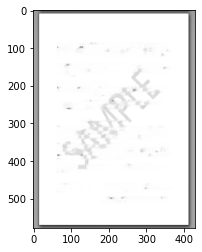

In [1]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
import tensorflow as tf
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read('watermark1.png')
    # generate (word, box) tuples
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]
       
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
       
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
       
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

img_text_removed = inpaint_text('../input/traffic-sign/traffic signs/1.jpg', pipeline)

plt.imshow(img_text_removed)

cv2.imwrite('text_removed_image1.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))

In [1]:
#Watermark Removing

import cv2
import numpy as np

img = cv2.imread("watermark1.png")

alpha = 2.0
beta = -160

new = alpha * img + beta
new = np.clip(new, 0, 255).astype(np.uint8)


cv2.imshow('To display image',new)
cv2.waitKey(0)
cv2.destroyAllWindows()
